# Numerical Integration and Differentiation
## Zain Fox-Latif | 21018444
This assignment explores the usage of various computational tools to calculate the second derivative of a wavefunction $\psi$. It begins with the definition of the wavefunction 
$$ \begin{equation} \psi(x) = (2 \alpha / \pi) e^{-2\alpha x^2}\end{equation} $$
where $ \alpha = 1.0 $ for the remainder of the assignment. Then, using
$$ \begin{equation} f''(x) = \frac{f(x + \Delta x) - 2f(x) + f(x-\Delta x)}{(\Delta x)^2} \end{equation}$$
the second derivative of $\psi$ was calculated. Following from this, the equations for energy
$$ \begin{equation} E_{KE} = -\frac{1}{2} \int  \psi \frac{\mathrm{d^2}\psi}{\mathrm{d}x^2} \mathrm{d}x \end{equation} $$
$$ \begin{equation} E_{PE} = -\frac{1}{2} k \int  \psi x^2 \psi \mathrm{d}x \end{equation} $$
were used to calculate the kinetic and potential energy of the quantum harmonic oscillator.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate


### Section on wavefunction and derivatives
Below, the necessary variables were defined before being inserted into $\mathrm{(1)}$ to calculate $\psi(x)$. The value for $\mathrm{dx}$ was chosen based on the spacing used for the exercise in-class. Then, $\mathrm{(2)}$ was written out to calculate $\psi''(x)$. Calculations of $\psi''(x)$ and $\psi(x)$ were carried out and plotted below for the sake of comparison.

In [28]:
# Defining a grid with dx spacing
dx: float = 10e-5
x: list = np.arange(-5, 5, dx)

# Calculating psi with the grid of x-values
alpha: float = 1.0
psi: list = (2*alpha/np.pi)**(1/4) * np.exp(-alpha*x**2)

In [29]:
def d2f(f: list, dx: float) -> list:
    """
    Calculates the second derivative 
    of a function using (2)

    Inputs:
    f   Array of values corresponding
        to f(x)
    dx  The spacing between adjacent
        values in the x-array

    Outputs:
    d2f   The second derivative of f

    """
    
    d2f: list = (np.roll(f, 1) - 2*f + np.roll(f, -1))/dx**2
    return d2f

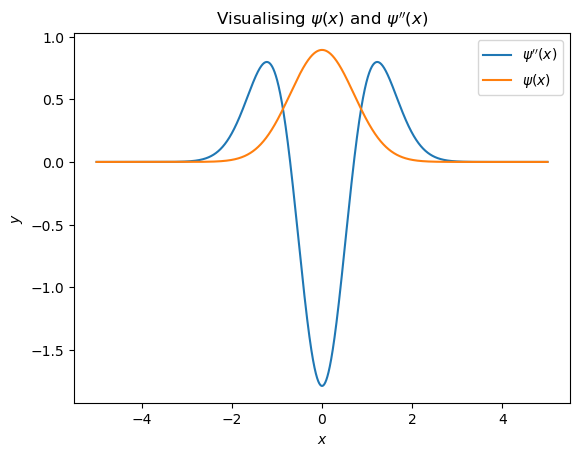

In [30]:
# Calculating d2psi
d2psi: list = d2f(psi, dx)

# Displaying d2psi alongside psi
plt.figure()
plt.plot(x, d2psi, label=r"$\psi''(x)$")
plt.plot(x, psi, label=r"$\psi(x)$")
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.title(r"Visualising $\psi(x)$ and $\psi''(x)$")
plt.legend()

### Section on evaluating the energy
In this section, $\mathrm{(4)}$ and $\mathrm{(5)}$ were used to calculate kinetic and potential energy respectively. 

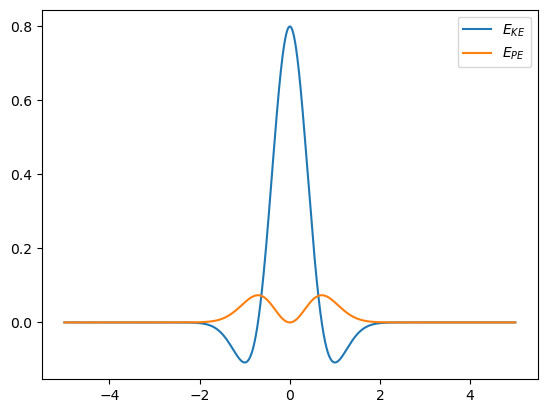

In [31]:
# Plotting psi*d2psi and psi*(0.5*x*x)*psi
y1: list = -0.5*psi*d2psi
y2: list = psi*(0.5*x**2)*psi

plt.figure()
plt.plot(x, y1, label=r'$E_{KE}$')
plt.plot(x, y2, label=r'$E_{PE}$')
plt.legend()

In [32]:
# Integrating using scipy.integrate()
T: float = integrate.simpson(y1, x)
V: float = integrate.simpson(y2, x)

# Printing results
print("Kinetic energy: {}".format(T))
print("Potential energy: {}".format(V))

Kinetic energy: 0.4999999987475282
Potential energy: 0.12499999999999997


### Conclusions
The value for kinetic energy is greater than the value for potential energy. This roughly corresponds to the sharper peak that one can observe for kinetic energy on the second graph. As grid spacing decreases, the values for kinetic energy and potential energy tend to $0.5$ and $0.125$ respectively.